In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [ ]:
pip install squarify

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/ecommerce retail.xlsx")

# Clean data

In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# drop missing value
data.dropna(inplace = True)

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# drop C or quantity <= 0
data = data[~data["InvoiceNo"].str.contains("C", na = False)]

# RFM Models

In [ ]:
recency = (dt.datetime(2011, 12, 31) - data.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)

In [ ]:
recency.head()

,Recency
CustomerID,
12346.0,346
12347.0,23
12348.0,96
12349.0,39
12350.0,331


In [ ]:
frequency = data.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
frequency.head()

,Frequency
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [ ]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [ ]:
monetary = data.groupby("CustomerID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary.head(5)

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [ ]:
rfm_models = pd.concat([recency, frequency, monetary],  axis=1)

In [ ]:
rfm_models["RecencyScore"] = pd.qcut(rfm_models["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm_models["FrequencyScore"]= pd.qcut(rfm_models["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm_models["MonetaryScore"] = pd.qcut(rfm_models['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm_models.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,346,1,77183.60,1,1,5
12347.0,23,7,4310.00,5,5,5
12348.0,96,4,1797.24,2,4,4
12349.0,39,1,1757.55,4,1,4
12350.0,331,1,334.40,1,1,2


In [ ]:
rfm_models["RFM_SCORE"] = (rfm_models['RecencyScore'].astype(str) +
                     rfm_models['FrequencyScore'].astype(str) +
                     rfm_models['MonetaryScore'].astype(str))

In [ ]:
rfm_models

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.0,346,1,77183.60,1,1,5,115
12347.0,23,7,4310.00,5,5,5,555
12348.0,96,4,1797.24,2,4,4,244
12349.0,39,1,1757.55,4,1,4,414
12350.0,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,298,1,180.60,1,2,1,121
18281.0,201,1,80.82,1,2,1,121
18282.0,28,2,178.05,5,3,1,531


In [ ]:
# transform and merge table
data_segment = pd.read_excel("/content/drive/MyDrive/ecommerce retail.xlsx",sheet_name=1)
data_segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
data_segment['RFM Score'] = data_segment['RFM Score'].str.split(',')
data_segment = data_segment.explode('RFM Score')


In [ ]:
data_segment.head(5)

,Segment,RFM Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454


In [ ]:
data_segment['RFM Score'] = data_segment['RFM Score'].astype(int)
rfm_models['RFM_SCORE'] = rfm_models['RFM_SCORE'].astype(int)

In [ ]:
merged_data = pd.merge(rfm_models,data_segment, left_on='RFM_SCORE', right_on='RFM Score', how='left')
merged_data


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,RFM Score
0,346,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,23,7,4310.00,5,5,5,555,Champions,555
2,96,4,1797.24,2,4,4,244,At Risk,244
3,39,1,1757.55,4,1,4,414,Promising,414
4,331,1,334.40,1,1,2,112,Lost customers,112
...,...,...,...,...,...,...,...,...,...
4334,298,1,180.60,1,2,1,121,Lost customers,121
4335,201,1,80.82,1,2,1,121,Lost customers,121
4336,28,2,178.05,5,3,1,531,Potential Loyalist,531
4337,24,16,2094.88,5,5,5,555,Champions,555


# Visualization


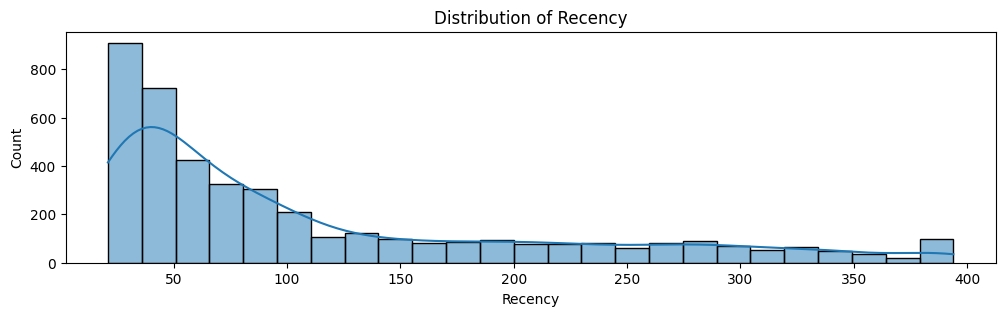

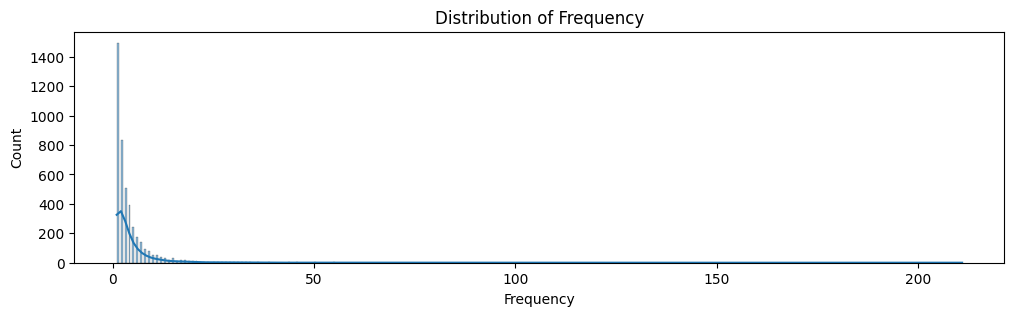

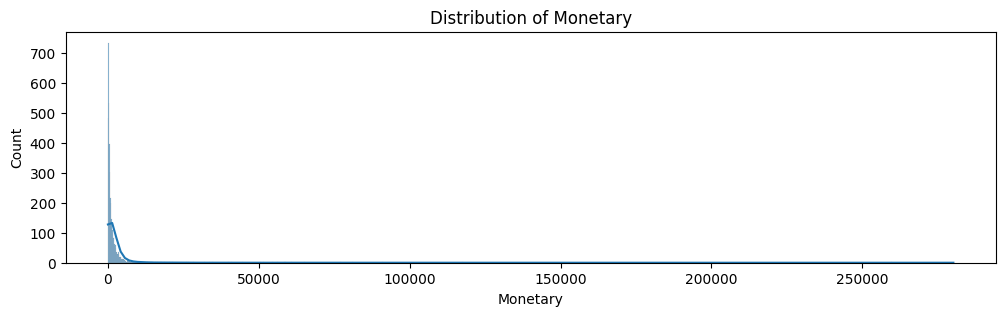

In [ ]:
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.histplot(merged_data[col], kde=True)
    ax.set_title('Distribution of %s' % col)
    plt.show()


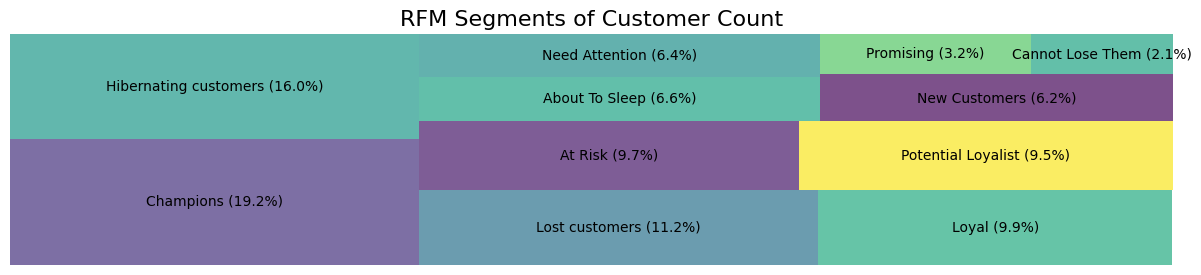

In [ ]:
plt.figure(figsize=(15, 3))
segments_count = merged_data['Segment'].value_counts()
total_count = segments_count.sum()
percentages = [(count / total_count) * 100 for count in segments_count]

squarify.plot(sizes=segments_count.values,
              label=[f'{i} ({p:.1f}%)' for i, p in zip(segments_count.index, percentages)],
              alpha=0.7)
plt.title('RFM Segments of Customer Count', fontsize  = 16)
plt.axis('off')
plt.show()

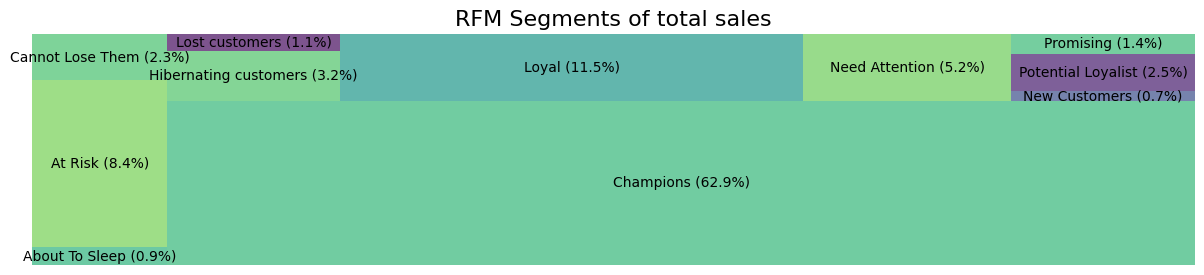

In [ ]:
plt.figure(figsize=(15, 3))
segments_sales = merged_data.groupby('Segment')['Monetary'].sum()
total_sales = segments_sales.sum()
percentages = [(sales / total_sales) * 100 for sales in segments_sales]

squarify.plot(sizes=segments_sales.values,
              label=[f'{i} ({p:.1f}%)' for i, p in zip(segments_sales.index, percentages)],
              alpha=0.7)
plt.title('RFM Segments of total sales', fontsize  = 16)
plt.axis('off')
plt.show()